DBSCAN: Density-Based Spatial Clustering of Applications with Noise
===

### A Brief History
DBSCAN was first proposed by Martin Ester et al. in 1996. The essence of the algorithm involves clustering densely clustered points together and leaving the rest marked as outliers. In 2014, it was awarded the test of time award at [KDD](kdd.org).

### Algorithm Outline
The classification scheme involves splitting points into *core points*, *density-reachable points* and *outliers*. Core points are those sets of points that have at least a set number of minimum points within a prespecified radius of length epsilon.
* Inputs:
    * MinPts: minimum number of points that need to be within epsilon distance of a chosen point in order for it to be considered a core point
    * Epsilon: parameter used to control definition of core point
* Outputs: 
    * Core Points: A point with at least MinPts within distance epsilon
    * Density-reachable points: A point q is densely reachable from p if there is a sequence of points p<sub>1</sub>,...,p<sub>n</sub> such that p<sub>i+1</sub> is directly reachable from p<sub>i</sub> and p<sub>n</sub>=q. An easy way to visualize this is as making "density-jumps" as in the figure below:
<img src='http://openi.nlm.nih.gov/imgs/512/26/3026373/3026373_1471-2105-11-S6-S26-1.png'>
    * Outliers: All points not reachable from any other points
* Steps:
    1. Pick a point at random that has not been assigned to a cluster and not labeled as an outlier. Compute its neighborhood to determine if it's a core point. If yes, start a cluster around this point. If no, then label as an outlier
    2. Add all densely reachable points. If an outlier is added then change its label to *border point*
    3. Repeat steps 1&2 until all points are either assigned to a cluster or labeled as outliers. 

In [15]:
from sklearn.cluster import DBSCAN

In [5]:
import pandas as pd
import numpy as np

In order to test out the DBSCAN algorithm, we will be using customer data from a wholesale distributor. It can be downloded [here](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

In [6]:
data = pd.read_csv(r'C:\Users\Crash_OverRide\Documents\Data Science\Learning Algorithms\DBSCAN\Wholesale customers data.csv')

In [7]:
#drop non-continuous vars
data.drop(["Channel","Region"],axis=1,inplace=True)

Simply pick two rows to visualize and run DBSCAN algo

In [8]:
data=data[["Grocery","Milk"]]
data = data.as_matrix().astype("float32", copy=False)

In [9]:
from sklearn import preprocessing, metrics

In [10]:
data_scaled = preprocessing.scale(data)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [12]:
x = data_scaled[0:len(data),0]
y = data_scaled[0:len(data),1]

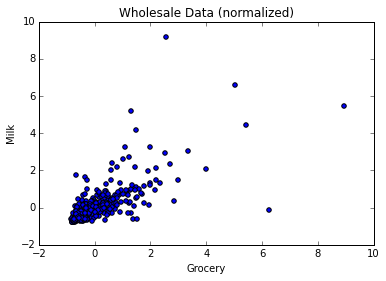

In [13]:
plt.scatter(x,y)
plt.xlabel("Grocery")
plt.ylabel("Milk")
plt.title("Wholesale Data (normalized)")

We can observe from the distrubtion of points that there is a core group centered around the normazlied mean of 0 for both Grocery and Milk. However, there are a few outlying customers that could potentially be targeted for promotions. Let's use the DBSCAN algorithm to identify these outliers. 

In [22]:
db = DBSCAN(eps=.5, min_samples=15).fit(data_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1


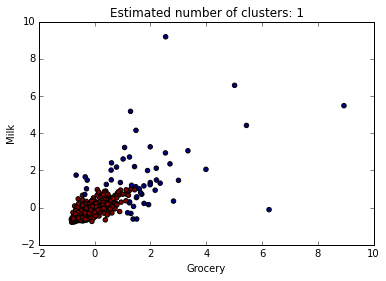

In [30]:
###################################################################
# Plot result
plt.scatter(x,y,c=core_samples_mask)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel("Grocery")
plt.ylabel("Milk")

We can get a list as well as a summary of the customers that are outliers:

In [85]:
data_labeled = pd.DataFrame(np.column_stack((x,y,core_samples_mask)),columns=["Grocery", "Milk","cluster"])
data_labeled.groupby("cluster").describe()

Grocery        Milk
cluster                              
0       count   53.000000   53.000000
        mean     1.857646    1.795474
        std      1.657284    1.833722
        min     -0.662773   -0.614525
        25%      1.182080    0.706693
        50%      1.508658    1.347362
        75%      2.209116    2.351705
        max      8.936528    9.183650
1       count  387.000000  387.000000
        mean    -0.254406   -0.245892
        std      0.480810    0.428552
        min     -0.837334   -0.778795
        25%     -0.623057   -0.599603
        50%     -0.434905   -0.352858
        75%      0.017511    0.029332
        max      1.434704    1.020042

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A43CCF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A56CDA0>], dtype=object)

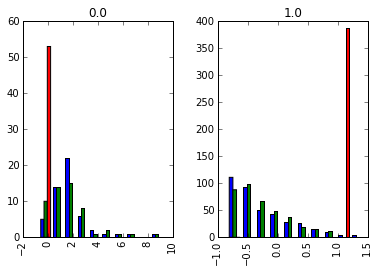

In [88]:
data_labeled.hist(by="cluster")

From the summary statistics by cluster as well as the histogram, we can observe that the distribution of quantiles for the outliers, group 0, is a lot higher than that of our clustered group, group 1. 

##Conclusions:
* DBSCAN is an effective algorithm at finding outliers if you can come up with a distance function.
* The parameters MinPts and epsilon seems to be arbritarily selected to come us with the number of clusters post-hoc. This might seem troublesome since we don't have an error function that we can evaluate over a test set. How well will this algorithm generalize? Hence, this algorithm almost have a slight flavor of post-hoc hierachical clustering even though we are not pre-specifying the number of clusters. 

*As a side note, it might be interesting to project the data into two-dimensional space using PCA and then perform DBSCAN on that projected space in order to solve a clustering or maybe even classification problem.*